# Text 1: Vector space models
**Internet Analytics - Lab 4**

---

**Group:** *J*

**Names:**

* *Dennis Gankin*
* *ZHANG Yuan*
* *JI Yipeng*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [61]:
import pickle
import numpy as np
from scipy.sparse import csr_matrix
from utils import load_json, load_pkl

courses = load_json('data/courses.txt')
stopwords = load_pkl('data/stopwords.pkl')

In [50]:
print(courses[0])

{'courseId': 'MSE-440', 'name': 'Composites technology', 'description': "The latest developments in processing and the novel generations of organic composites are discussed. Nanocomposites, adaptive composites and biocomposites are presented. Product development, cost analysis and study of new markets are practiced in team work. Content Basics of composite materialsConstituentsProcessing of compositesDesign of composite structures\xa0Current developmentNanocomposites Textile compositesBiocompositesAdaptive composites\xa0ApplicationsDriving forces and marketsCost analysisAerospaceAutomotiveSport Keywords Composites - Applications - Nanocomposites - Biocomposites - Adaptive composites - Design - Cost Learning Prerequisites Required courses Notion of polymers Recommended courses Polymer Composites Learning Outcomes By the end of the course, the student must be able to: Propose suitable design, production and performance criteria for the production of a composite partApply the basic equati

In [60]:
for course in courses:
    course['description']= re.findall(r'[A-Z]?[a-z]+|[A-Z]+(?=[A-Z]|$)', course['description'])

In [59]:
print(word_tokenize(courses[0]['description']))

['The', 'latest', 'developments', 'in', 'processing', 'and', 'the', 'novel', 'generations', 'of', 'organic', 'composites', 'are', 'discussed', '.', 'Nanocomposites', ',', 'adaptive', 'composites', 'and', 'biocomposites', 'are', 'presented', '.', 'Product', 'development', ',', 'cost', 'analysis', 'and', 'study', 'of', 'new', 'markets', 'are', 'practiced', 'in', 'team', 'work', '.', 'Content', 'Basics', 'of', 'composite', 'materialsConstituentsProcessing', 'of', 'compositesDesign', 'of', 'composite', 'structures', 'Current', 'developmentNanocomposites', 'Textile', 'compositesBiocompositesAdaptive', 'composites', 'ApplicationsDriving', 'forces', 'and', 'marketsCost', 'analysisAerospaceAutomotiveSport', 'Keywords', 'Composites', '-', 'Applications', '-', 'Nanocomposites', '-', 'Biocomposites', '-', 'Adaptive', 'composites', '-', 'Design', '-', 'Cost', 'Learning', 'Prerequisites', 'Required', 'courses', 'Notion', 'of', 'polymers', 'Recommended', 'courses', 'Polymer', 'Composites', 'Learning

## Exercise 4.1: Pre-processing

In [3]:
#add punctiation to the stop words, to remove it, too
punctuation=set({'’', '=', '-', '/', '{', '#', '.,', '):', '"', '(', '$', '`', ');', ',', ')', '+', '?', "'", '.', '\t', '\n', '|', '}', '://', '%).', '[', '),', '_', '^', '”', ';', '%', '&', '<', '>', ':', '\\', '~', '*', '!', ']', '",', ').', '&)', '@'})
stopwords.update(punctuation)

In [4]:
#a function that reads a list and return the bi- and tri-gram of consecutive items from the list appended at the end of list 
def bitrigrams(l):
    zip1 = list(zip(l, l[1:]))
    zip2 = list(zip(l, l[1:], l[2:]))   
    bil = [str(tup[0])+' '+str(tup[1]) for tup in zip1]
    tril = [str(tup[0])+' '+str(tup[1])+' '+str(tup[2]) for tup in zip2]  
    return l+bil+tril

In [124]:
def digit_split(s):
    return list(filter(None, re.split(r'(\d+)', s)))


#import natural language toolkit for processing
import nltk
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import *
import re

def preprocess(course_list):
    #removing stopwords, punctuation, splitting numbers and words
    

    #dict to count frequency
    word_freq = {}
    processed_courses= course_list.copy()

    for course_id, course in enumerate(courses):
        #there are camel cases which are words sticked together
        description = course['description']
        temp = re.findall(r'[A-Z]?[a-z]+|[A-Z]+(?=[A-Z]|$)', description)
        wordlist = []
        for i in range(len(temp)):
            word = temp[i].lower() # to lowercase
            temp_wordlist=[]
            temp_wordlist.append(digit_split(word))#split words concatinated with a number (without space inbetween)
            #remove stopwords and puctuation and check if word alphabetic (probably unneccessary)
            for i in range(len(temp_wordlist)):
                if (word not in stopwords) and word.isalpha(): 
                    wordlist.append(word)
                    #add to frequency list
                    word_freq[word]=word_freq.get(word,0)+1
        processed_courses[course_id]['wordlist'] = bitrigrams(wordlist)
    return processed_courses,nltk.FreqDist(word_freq)

In [125]:
processed_courses,word_freq=preprocess(courses)

In [126]:
print (processed_courses[0])

{'courseId': 'MSE-440', 'name': 'Composites technology', 'description': "The latest developments in processing and the novel generations of organic composites are discussed. Nanocomposites, adaptive composites and biocomposites are presented. Product development, cost analysis and study of new markets are practiced in team work. Content Basics of composite materialsConstituentsProcessing of compositesDesign of composite structures\xa0Current developmentNanocomposites Textile compositesBiocompositesAdaptive composites\xa0ApplicationsDriving forces and marketsCost analysisAerospaceAutomotiveSport Keywords Composites - Applications - Nanocomposites - Biocomposites - Adaptive composites - Design - Cost Learning Prerequisites Required courses Notion of polymers Recommended courses Polymer Composites Learning Outcomes By the end of the course, the student must be able to: Propose suitable design, production and performance criteria for the production of a composite partApply the basic equati

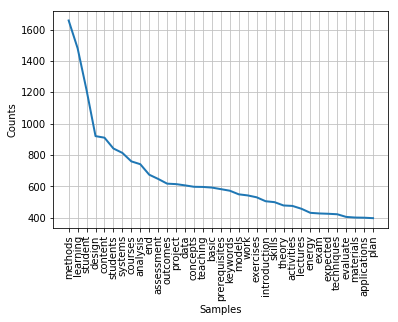

In [127]:
word_freq.plot(35,cumulative=False)

In [20]:
#TODO: chose amount of words to filter how do we do the filtering? how many of the most frequent to delete?

In [21]:
#todo get leats frequent words
most_frequent=[word[0] for word in word_freq.most_common(10)]

In [22]:
def delete_words(course_list, to_delete):
    #removing stopwords, punctuation, splitting numbers and words
    

    #dict to count frequency
    word_freq = {}
    processed_courses= course_list.copy()

    for course_id, course in enumerate(course_list):
        #preprocess the description
        wordlist = course['wordlist']
        
        
        new_word_list = []
        for word in wordlist:
            #remove words to be deleted
            if (word not in to_delete): 
                new_word_list.append(word)
                #add to frequency list
                word_freq[word]=word_freq.get(word,0)+1
                    
        processed_courses[course_id]['cut_wordlist'] = new_word_list
    
    return processed_courses,nltk.FreqDist(word_freq)


In [23]:
processed_courses,word_freq=delete_words(courses,most_frequent)

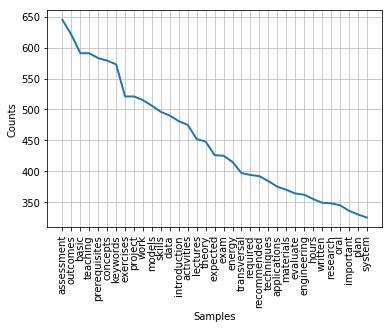

In [24]:
word_freq.plot(35)

In [128]:
#stemming
#The idea of stemming is a sort of normalizing method. Many variations of words carry the same meaning, other than when tense is involved.
#https://likegeeks.com/nlp-tutorial-using-python-nltk/
#https://pythonprogramming.net/stemming-nltk-tutorial/?completed=/stop-words-nltk-tutorial/

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
wnl = WordNetLemmatizer()
# ls = LancasterStemmer()

pritn = wnl.lemmatize("studing")
# print(test)

LookupError: 
**********************************************************************
  Resource 'corpora/wordnet' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - '/Users/alex_zy/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

In [8]:
def stemming(course_list,wordlist="cut_wordlist"):
    processed_courses= course_list.copy()
    all_stems = set()

    for course_id, course in enumerate(processed_courses):
        words = course[wordlist]
    
        course_stems = []
        for word in words:
            course_stems.append(ps.stem(word))
            processed_courses[course_id]['stems'] = course_stems
            all_stems.update(course_stems)
    
    return processed_courses, all_stems

In [102]:
processed_courses,stems=stemming(processed_courses)

In [104]:
#TODO lemmatization

#TODO explain why we chose what

10872

In [110]:
#print IX class
IX_class = next((item for item in processed_courses if item["courseId"] == "COM-308"))
#print terms, in our case stems..?
IX_stems=(list(set(IX_class['stems'])))
IX_stems.sort()
print(IX_stems)

['acquir', 'activ', 'ad', 'advertis', 'algebra', 'algorithm', 'analyt', 'apach', 'applic', 'assess', 'auction', 'balanc', 'base', 'basic', 'cathedra', 'chain', 'class', 'cloud', 'cluster', 'collect', 'combin', 'commerc', 'commun', 'comput', 'concept', 'concret', 'contain', 'coverag', 'curat', 'current', 'data', 'dataset', 'decad', 'dedic', 'design', 'detect', 'dimension', 'draw', 'effect', 'effici', 'exam', 'expect', 'explor', 'field', 'final', 'foundat', 'framework', 'function', 'fundament', 'good', 'graph', 'hadoop', 'hand', 'homework', 'import', 'inform', 'infrastructur', 'inspir', 'internet', 'java', 'key', 'keyword', 'knowledg', 'lab', 'laboratori', 'larg', 'lectur', 'linear', 'machin', 'main', 'map', 'markov', 'materi', 'media', 'midterm', 'mine', 'model', 'modelsdata', 'network', 'number', 'onlin', 'outcom', 'past', 'practic', 'prerequisit', 'problem', 'project', 'provid', 'question', 'real', 'recommend', 'reduc', 'reduct', 'relat', 'requir', 'retriev', 'scale', 'search', 'seek'

## Exercise 4.2: Term-document matrix

In [118]:
n = len(stems)
m = len(processed_courses)
TF_matrix = np.zeros((n, m))

stems_list=list(stems)
stems_list.sort()

n_ids = stems_list
m_ids = [d['courseId'] for d in processed_courses]

In [119]:
# TF matrix
from collections import Counter

for course_id, course in enumerate(processed_courses):
    terms = course['stems']
    term_counter = Counter(terms)
    number_terms = len(terms)
    for key, value in term_counter.items():
        #get index of the term
        n_id = n_ids.index(key)
        TF_matrix[n_id][course_id] = value


In [121]:
#IDF
denom = np.apply_along_axis(np.count_nonzero, 1, TF_matrix) # doesnt work for some reason np.count_nonzero(TF_matrix, axis=1)
IDF_vector = np.log(m / denom)
TFIDF_matrix = TF_matrix * np.array([IDF_vector]).T

In [122]:
# Saving
save_pkl(TFIDF_matrix, 'tfidf.pkl')
save_pkl(stems_list, 'terms.pkl')
save_pkl(preprocessed_courses, 'courses.pkl')

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [123]:
IX_index = m_ids.index('COM-308')
IX_TFIDF_col = TFIDF_matrix[:,IX_index]

IX_TFIDF_vals = {}
for ind, val in enumerate(IX_TFIDF_col):
    if not val > 0.0:
        continue
    IX_TFIDF_vals[n_ids[ind]] = val

In [126]:
from collections import OrderedDict
import  operator

IX_TFIDF_vals_ordered = OrderedDict(sorted(IX_TFIDF_vals.items(),key = operator.itemgetter(1),reverse = True))
IX_TFIDF_vals_ordered

OrderedDict([('mine', 18.681958608434936),
             ('onlin', 17.459173278835436),
             ('social', 15.695066405721727),
             ('explor', 15.061307877526007),
             ('world', 14.393650914403395),
             ('hadoop', 12.11356802645725),
             ('real', 11.42011537566993),
             ('servic', 10.843310933578261),
             ('auction', 10.727273665337359),
             ('commerc', 10.727273665337359),
             ('internet', 9.6080420894665135),
             ('retriev', 9.6080420894665135),
             ('network', 9.3728477860972674),
             ('dataset', 8.5300490880011388),
             ('stream', 8.369963672654066),
             ('data', 8.0297108516011804),
             ('ad', 7.9546849430975772),
             ('larg', 7.8683904262304338),
             ('cluster', 7.4108175121302935),
             ('graph', 7.3177774808605083),
             ('scale', 7.2575935605067166),
             ('lab', 7.1796671012969338),
             ('apach', 6

In [ ]:
#TODO explain difference

## Exercise 4.3: Document similarity search

In [128]:
#create query verctors
markov_chain = np.zeros(n)
markov_chain[n_indices.index('markov')] = 1/2
markov_chain[n_indices.index('chain')] = 1/2

facebook = np.zeros(n)
facebook[n_indices.index('facebook')] = 1

In [129]:
#similarity function
def cosine_sim(d1, d2):
    return np.dot(d1, d2) / (np.linalg.norm(d1) * np.linalg.norm(d2))

In [138]:
def get_top5queries(query_vec,query_name):
    documents = np.apply_along_axis(cosine_sim, 0, TFIDF_matrix, query_vec)
    top5=np.argsort(documents)[-5:][::-1]
    
    top = []
    for course in top5:
        top.append((processed_courses[course]['name'], documents[course]))
    
    print("Top five matches for the query ",query_name," and the according similarity:")
    _ = [print(' -', name, ':', prob) for name, prob in top]
    

In [137]:
get_top5queries(markov_chain,"markov chain")
print("\n")
get_top5queries(facebook,"facebook")

Top five matches for the query  markov chain  and the according similarity:
 - Applied probability & stochastic processes : 0.554119712476
 - Applied stochastic processes : 0.551783426651
 - Markov chains and algorithmic applications : 0.381726235952
 - Supply chain management : 0.377917987996
 - Mathematical models in supply chain management : 0.31179822016


Top five matches for the query  facebook  and the according similarity:
 - Computational Social Media : 0.17945381178
 - Hydrogeophysics : 0.0
 - Electronic properties of solids and superconductivity : 0.0
 - CCMX Advanced Course - Instrumented Nanoindentation : 0.0
 - Molecular and cellular biophysic II : 0.0


In [139]:
#explain better



We observe that while the first query gives us good results, the second query 'facebook' only returns one document with a non-zero 'similarity'/probability'???. 

disadvantage of vector space retrieval models - it is not able to generalize the concepts of the terms

so if the word 'facebook' does not occur in any course descriptions, we will not be able to give any relevance, even though they contain phrases like 'social media'